In [9]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
data = pd.read_csv('dadosclientes.csv')

In [11]:
# Exibir as primeiras linhas dos dados para entender a estrutura
print(data.head())

    clientes  Valor_compra  qtde_produtos  forma_pag
0  cliente 2           378             10          1
1  cliente 5           475             18          1
2  cliente 1           285             10          1
3  cliente 1           181              4          0
4  cliente 7           177             20          1


In [12]:
# Verificar os tipos de dados
print(data.dtypes)


clientes         object
Valor_compra      int64
qtde_produtos     int64
forma_pag         int64
dtype: object


In [13]:
# Codificar variáveis categóricas
label_encoders = {}
for column in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[column] = le.fit_transform(data[column])
    label_encoders[column] = le

In [14]:
# Verificar se há dados faltantes
print(data.isnull().sum())

clientes         0
Valor_compra     0
qtde_produtos    0
forma_pag        0
dtype: int64


In [15]:
# Separar características e variável de destino
X = data.drop(columns='forma_pag')
y = data['forma_pag']

In [16]:
# Dividir os dados em conjuntos de treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
# 2. Treinar o Modelo SVM
model = SVC(kernel='linear')  # Você pode ajustar o kernel conforme necessário
model.fit(X_train, y_train)

SVC(kernel='linear')

In [18]:
# 3. Fazer Previsões e Avaliar o Modelo
y_pred = model.predict(X_test)

In [19]:
# Avaliar o modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\dsadm\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [20]:
# Exibir os resultados
print(f'Acurácia: {accuracy}')
print('Matriz de Confusão:')
print(conf_matrix)
print('Relatório de Classificação:')
print(class_report)

Acurácia: 0.3
Matriz de Confusão:
[[ 0 42]
 [ 0 18]]
Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        42
           1       0.30      1.00      0.46        18

    accuracy                           0.30        60
   macro avg       0.15      0.50      0.23        60
weighted avg       0.09      0.30      0.14        60



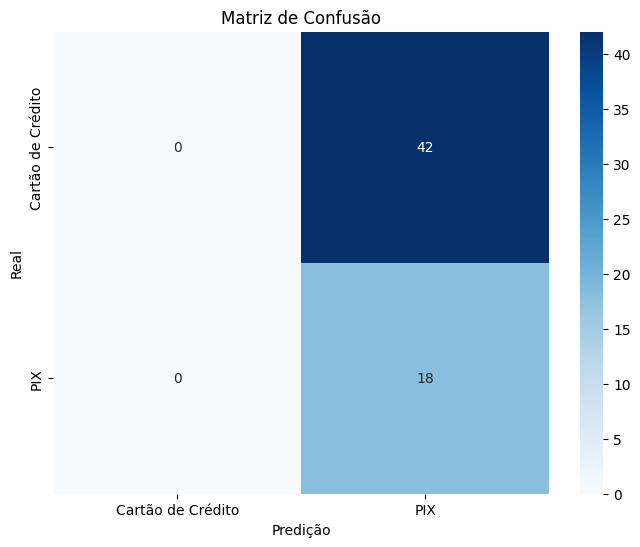

In [21]:
# 4. Plotar a Matriz de Confusão
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Cartão de Crédito', 'PIX'],
            yticklabels=['Cartão de Crédito', 'PIX'])
ax.set_xlabel('Predição')
ax.set_ylabel('Real')
ax.set_title('Matriz de Confusão')
plt.show()